<a href="https://colab.research.google.com/github/JesusGautamah/cn-api-py-nb/blob/main/CrawledNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Consumindo Crawled News API**

##Requisitos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import requests
import json 
import time
from datetime import datetime
from pandas.plotting import register_matplotlib_converters



register_matplotlib_converters()

pd.set_option('display.max_colwidth',1000)

##**Exemplos de filtros e pesquisa, realizando coleta de dados da pagina root da api, transfomando colunas publish_date e created_at no formato datetime**

In [2]:
# ------------------ EXEMPLOS ---------------------
# url = "https://crawler-news.herokuapp.com/api/v1/crawled_news?start=10-03-2021" Period Filter
# url = "https://crawler-news.herokuapp.com/api/v1/crawled_news?end=10-03-2019" Period Filter
# url = "https://crawler-news.herokuapp.com/api/v1/crawled_news?start=01-09-2020&end=31-10-2020" #Period Filter
# url = "https://crawler-news.herokuapp.com/api/v1/crawled_news?text_search=São+Paulo" Like
# url = "https://crawler-news.herokuapp.com/api/v1/crawled_news?title_search=São+Paulo" Like 
# url = "https://crawler-news.herokuapp.com/api/v1/crawled_news?full_text=artista" Full Text
# url = "https://crawler-news.herokuapp.com/api/v1/crawled_news/:id" object return by id


# Pegando url
url = "https://crawler-news.herokuapp.com/api/v1/"

# Realizando request e solicitando a saida em json
JSONContent = requests.get(url).json()

# Realizando dump do json
content = json.dumps(JSONContent, indent = 4, sort_keys=True)

# Transformando em string
x = str(content)

# transformando em dict
dictdump = json.loads(x)



# criando dataframe
df = pd.DataFrame(dictdump)

# transformando colunas em datetime
df['publish_date'] = pd.to_datetime(df['publish_date'])
df['created_at'] = pd.to_datetime(df['created_at'])




##**Observação dos dados**



In [3]:
# Observação
print("A noticia coletada de publicação main recente:", max(df['publish_date']))


print("A noticia coletada de publicação mais antiga:", min(df['publish_date']))

A noticia coletada de publicação main recente: 2021-10-02 00:00:00
A noticia coletada de publicação mais antiga: 2015-05-05 00:00:00


##**Verificando títulos**

In [4]:
df["title"]

0                                                                                          Interior de São Paulo terá novo trem turístico                                        
1                                                                                              Como estimular o turismo náutico no Brasil                                        
2                                                                           Shopping popular será referência para o turista em Rio Branco                                        
3                                                                             Rede hoteleira pede apoio para cumprir plano de crescimento                                        
4                                                                          Ações de sustentabilidade rendem prêmio a meios de hospedagem                                         
                                                                                          ...                 

##**Publicações por dia**


In [5]:
print("Quanta publicações foram feitas em cada dia listado\n",df["publish_date"].value_counts())

Quanta publicações foram feitas em cada dia listado
 2021-04-28    31
2020-10-16    31
2016-07-12    31
2018-04-13    30
2015-08-25    29
              ..
2017-12-13     1
2020-03-02     1
2017-09-01     1
2021-02-03     1
2019-08-12     1
Name: publish_date, Length: 1624, dtype: int64


##**Numero de publicações por meses e ano**

In [6]:
df['publish_date'].groupby([df['publish_date'].dt.year, df['publish_date'].dt.month]).agg('count')

publish_date  publish_date
2015          5                76
              6                73
              7                76
              8               101
              9                77
                             ... 
2021          6                87
              7                95
              8               105
              9                90
              10               10
Name: publish_date, Length: 78, dtype: int64

#**Grafico de frequencia de publicação**

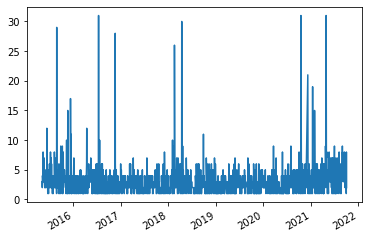

In [7]:
df['publish_date'].value_counts().plot()

#**Minerando dados no metodo show com barra de progresso(Não recomendado, utilize pesquisa e filtragem)**

In [8]:
i = 1

l = 1000

x = 100


crawled_news = []

for i in tqdm(range(x)):
  url = "https://crawler-news.herokuapp.com/api/v1/crawled_news/"+ str(l)
  JSONContent = requests.get(url).json()
  crawled_news.append([JSONContent['id'], JSONContent['created_at'], JSONContent['publish_date'],JSONContent['title'], JSONContent['subtitle']])
  l += 1
  time.sleep(1)



100%|██████████| 100/100 [01:53<00:00,  1.14s/it]


##**Iniciando dataframe 2 e renomeando colunas**

In [9]:
df_2 = pd.DataFrame(crawled_news)
df_2.columns = ['Id', 'Coletado em', 'Publicado Em', 'Titulo', 'Subtitulo']
df_2

,Id,Coletado em,Publicado Em,Titulo,Subtitulo
0,1000,2021-10-03T13:43:30.326Z,2020-10-16,Novos empreendimentos turísticos mostram confiança de investidores no país,"Atrações como parques e rodas-gigantes ajudam a fomentar o turismo, recuperar a economia e gerar emprego e renda à população"
1,1001,2021-10-03T13:43:34.551Z,2020-10-15,Municípios têm até sábado para pleitearem recursos da Lei Aldir Blanc,"Ministério do Turismo já repassou R$ 2,6 bilhões para apoiar a cultura em todo o Brasil"
2,1002,2021-10-03T13:43:38.083Z,2020-10-15,Brasil e Paraguai reabrem fronteiras para circulação de pessoas,"Medida, que inclui a Ponte da Amizade, vai impulsionar o fluxo de visitantes internacionais ao nosso país"
3,1003,2021-10-03T13:43:42.445Z,2020-10-15,João Pessoa terá maior polo turístico planejado do Nordeste,Empreendimento contribuirá para o fortalecimento da atividade turística no estado e na região
4,1004,2021-10-03T13:43:45.846Z,2020-10-15,"Pelo quarto mês seguido, índice de atividades turísticas cresce no país","Número teve alta de 19,3% entre julho e agosto e já acumula crescimento de 63,4%"
...,...,...,...,...,...
95,1095,2021-10-03T13:52:19.989Z,2020-09-09,Lei que concede crédito de R$ 5 bi para o turismo na pandemia é sancionada,Texto publicado no Diário Oficial da União nesta quarta-feira é resultado de Medida Provisória apresentada pelo Ministério do Turismo
96,1096,2021-10-03T13:52:21.300Z,2020-09-09,Restauração em santuário de Ouro Preto (MG) revela elementos históricos,"Ministro do Turismo, Marcelo Álvaro Antônio, visitou obras da igreja N. Sra. da Conceição&nbsp;que conta&nbsp;com recursos do IPHAN"
97,1097,2021-10-03T13:52:24.702Z,2020-09-09,Governo Federal reabre parques nacionais no Piauí,Unidades da Serra da Capivara e de Sete Cidades estão disponíveis ao público com medidas de prevenção ao coronavírus
98,1098,2021-10-03T13:52:27.680Z,2020-09-08,Feriado registra alta taxa de ocupação hoteleira no país,"Obedecendo a protocolos de segurança sanitária, estabelecimentos registraram até 100% da capacidade atendida por turistas"


##**Convertendo 'Publicado Em' para o formato datetime e imprimindo grafico de quantidade de publicações entre os dados do dataframe df_2**

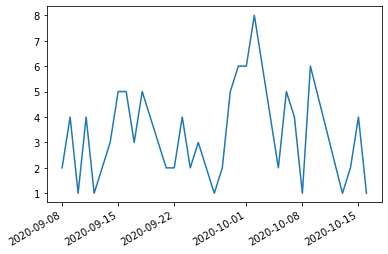

In [10]:

df_2['Publicado Em'] = pd.to_datetime(df_2['Publicado Em'])

df_2['Publicado Em'].value_counts().plot()

